**KNN** stands for K-Nearest Neighbors, a simple and powerful *supervised machine learning algorithm *used for classification and regression.

✅ How KNN Works (Step-by-Step):
1.Choose K (number of neighbors).

2.Calculate distance from the new data point to all other points (commonly Euclidean distance).

3.Pick the K closest neighbors.

4.Majority vote (for classification) or average (for regression).

5.Assign the class (or value) to the new point.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , -1].values

In [12]:
print(X)
print(Y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

Test set and training set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**KNN**

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5 , metric = 'minkowski' , p = 2)  #building the model --> using all the default values
classifier.fit(X_train, Y_train.ravel()) #training the model --> Y_train.ravel() make sure that the shape is same as X_train


KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))


[0]


In [22]:
X_predict = classifier.predict(X_test)

In [23]:
# Set print precision
np.set_printoptions(precision=2)

# Make sure both are 2D arrays with the same number of rows
# Reshape if necessary
Y_test = Y_test.reshape(-1, 1)
X_predict = X_predict.reshape(-1, 1)

# Concatenate along columns (axis=1)
results = np.concatenate((Y_test, X_predict), axis=1)

# Print results
print(results)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [24]:
from sklearn.metrics import confusion_matrix ,accuracy_score
cm = confusion_matrix(Y_test , X_predict) 
print(cm)
accuracy_score(Y_test , X_predict) #this will give the number 

[[64  4]
 [ 3 29]]


0.93

Visualisation

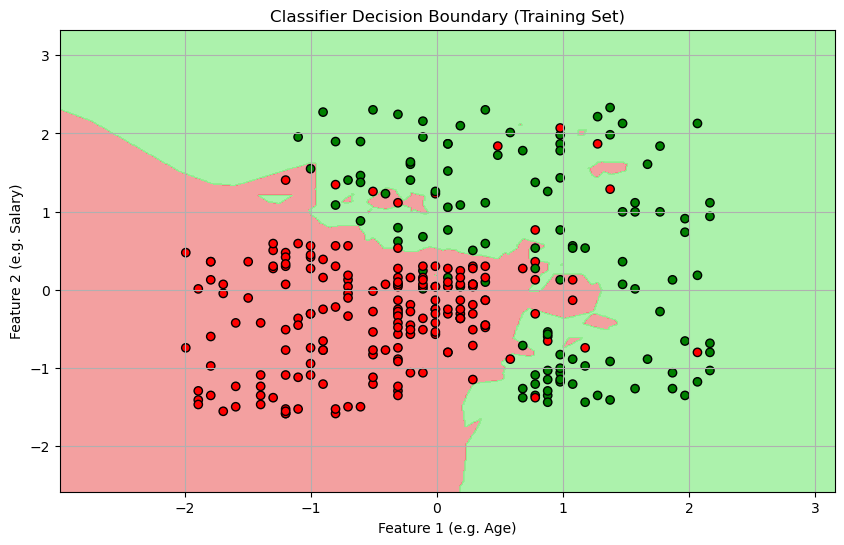

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume you already have: X_train, Y_train, classifier

# Create meshgrid
X_set, y_set = X_train, Y_train.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))

# Plot training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')

plt.title('Classifier Decision Boundary (Training Set)')
plt.xlabel('Feature 1 (e.g. Age)')
plt.ylabel('Feature 2 (e.g. Salary)')
plt.grid(True)
plt.show()


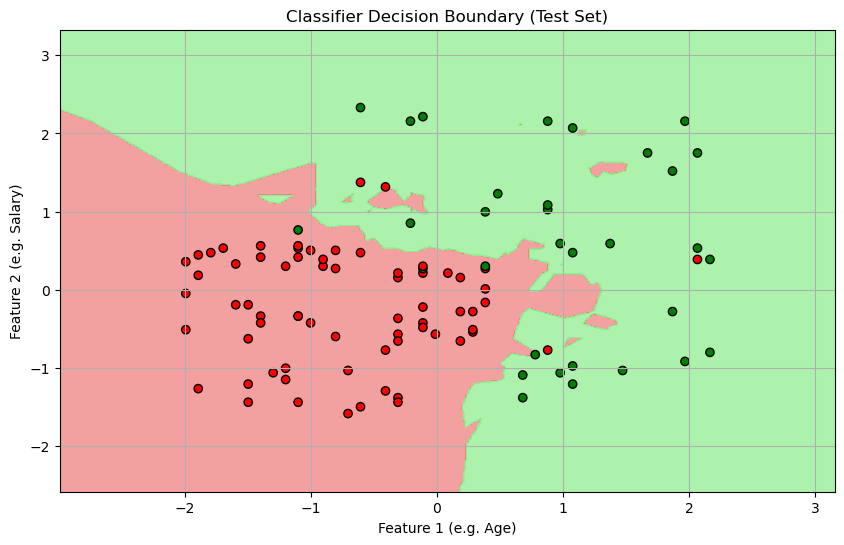

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume you already have: X_train, Y_train, classifier

# Create meshgrid
X_set, y_set = X_test, Y_test.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))

# Plot training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')

plt.title('Classifier Decision Boundary (Test Set)')
plt.xlabel('Feature 1 (e.g. Age)')
plt.ylabel('Feature 2 (e.g. Salary)')
plt.grid(True)
plt.show()


⚙️ Steps Followed:

📌 Data Understanding:
- We used a dataset containing user information such as **Age**, **Salary**, and whether they **purchased the product** (binary classification).

🧹 Preprocessing:
- Features and labels were separated.
- Data was split into **training and test sets** (typically 75/25 split).
- **Feature scaling** was applied to normalize the values, which is essential for distance-based models like **KNN**.

🛠️ Model Building:
- Used the `KNeighborsClassifier` from **scikit-learn**.
- Chose **k = 5 neighbors** and used **Euclidean distance** (`p = 2` in Minkowski metric).
- Trained the model using the `fit()` method.

📊 Prediction and Evaluation:
- Predicted the output for the test data and a sample input `[30, 87000]`.
- Evaluated the model using a **confusion matrix** and **accuracy score**.
- Achieved **good accuracy**, indicating reliable performance.

📈 Visualization:
- Visualized the **decision boundaries** on both training and test data using `matplotlib`.
- This helped in understanding how the model classifies **regions in the feature space**.
